In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [3]:
%run _functions.ipynb

In [4]:
save_files = 'files/Section4-Linear-models-research'

In [5]:
save_img = 'docs/img/Section4-Linear-models-research'

In [6]:
session_name = 'Section4-Linear-models-research'

# Section IV. Linear Models Comparing

## Load Saved Section if exists

## Load Data

In [7]:
# dicts
datasets_dict = loadit(
    'datasets_dict', dir='Section3-Feature-selection-and-Preprocessing')
features_dict = loadit(
    'features_dict', dir='Section3-Feature-selection-and-Preprocessing')
simulation_datasets_dict = loadit(
    'simulation_datasets_dict', dir='Section3-Feature-selection-and-Preprocessing')
estimators_dict = loadit(
    'estimators_dict', dir='Section3-Feature-selection-and-Preprocessing')
evaluation_dict = loadit(
    'evaluation_dict', dir='Section3-Feature-selection-and-Preprocessing')
# datasets
train = datasets_dict['train'].copy()
train_cv = datasets_dict['train_cv'].copy()
# features
features = features_dict['features']
numeric = features_dict['numeric']
ordinal = features_dict['ordinal']
categorical = features_dict['categorical']
categorical_transform = features_dict['categorical_transform']
factor = features_dict['factor']
target = features_dict['target']

## Elastic Net regularization effects

### Datasets

In [8]:
X = train_cv[features].copy()
y = train_cv[target]

In [9]:
X.shape

(1311, 104)

In [10]:
X.head()

,mssubclass,lg_lotfrontage,lg_lotarea,yearbuilt,lg_yearremodadd,lg_masvnrarea,lg_bsmtfinsf_first,lg_bsmtfinsf_second,lg_bsmtunfsf,lg_totalbsmtsf,...,lowqualfinsf_exst,second_flrsf_exst,garagearea_exst,wooddecksf_exst,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst
907,50,4.465908,9.350189,1936,7.594884,0.0,5.411646,0.0,6.678342,6.925595,...,0,1,1,0,0,0,0,1,0,0
782,20,4.219508,9.698061,2001,7.602401,0.0,0.000000,0.0,7.254178,7.254178,...,0,0,1,0,1,0,0,0,0,0
952,85,4.110874,8.881975,1972,7.602900,0.0,6.493754,0.0,4.691348,6.645091,...,0,0,1,1,0,0,0,0,0,0
620,30,3.828641,9.017847,1914,7.576097,0.0,3.737670,0.0,6.714171,6.762730,...,0,0,0,0,0,1,0,0,0,0
669,30,4.394449,9.358847,1922,7.576097,0.0,0.000000,0.0,6.552508,6.552508,...,0,0,1,0,0,1,0,0,0,0


In [11]:
y.head()

907    12.429216
782    12.139399
952    11.804849
620    11.112448
669    11.831379
Name: price, dtype: float64

### Preprocessors

In [12]:
encoder = OrdinalEncoder(
    encoding_method='ordered',
    variables=categorical_transform,
    missing_values='ignore',
    unseen='encode'
)

In [13]:
scaler = StandardScaler()

### Common Hyperparameters

In [14]:
alphas = np.logspace(-3, 3, 30)
n_folds = 5

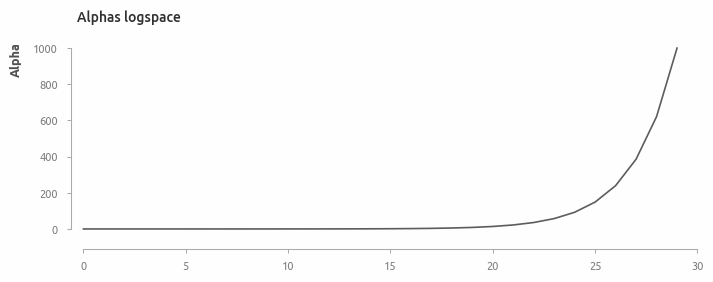

Images 'alphas_logspace.png' and 'alphas_logspace.svg' successfully saved into 'docs/img/Section4-Linear-models-research' directory


In [15]:
fig = plt.figure(figsize=(8, 2.5))
plt.plot(alphas)
# plt.grid(False)
plt.title('Alphas logspace')
axis_rstyle(
    xticks=[0, 30, 5],
    yticks=[0, 1000, 200])
plt.ylabel('Alpha')
plt.show()

savefig('alphas_logspace', save_img)

### GridSearch

In [16]:
enet_cv_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', scaler),
    ('estimator', ElasticNet(max_iter=100000))
])

In [17]:
enet_cv_pipeline

Pipeline(steps=[('encoder',
                 OrdinalEncoder(missing_values='ignore', unseen='encode',
                                variables=['mszoning', 'street', 'alley',
                                           'lotshape', 'landcontour',
                                           'utilities', 'lotconfig',
                                           'landslope', 'neighborhood',
                                           'condition_first',
                                           'condition_second', 'bldgtype',
                                           'housestyle', 'roofstyle',
                                           'roofmatl', 'exterior_first',
                                           'exterior_second', 'masvnrtype',
                                           'foundation', 'heating',
                                           'centralair', 'electrical',
                                           'paveddrive', 'fence', 'miscfeature',
                                           'saletype', 'salecondition',
                                           'mssubclass'])),
                ('scaler', StandardScaler()),
                ('estimator', ElasticNet(max_iter=100000))])

In [18]:
enet_params = [{
    'estimator__alpha': alphas
}]

In [19]:
enet_cv = GridSearchCV(
    estimator=enet_cv_pipeline,
    param_grid=enet_params,
    scoring='neg_root_mean_squared_error',
    cv=n_folds,
    refit=False
)

In [20]:
st = stopwatch.start()
enet_cv.fit(X, y)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:00:32


In [21]:
enet_cv_best_score = abs(enet_cv.best_score_)
enet_cv_best_score

0.11780220227243528

In [22]:
enet_cv_best_params = {}

for key in enet_cv.best_params_.keys():
    new_key = key.lstrip('estimator')
    new_key = new_key.lstrip('__')
    enet_cv_best_params[new_key] = enet_cv.best_params_[key]
    
enet_cv_best_params

{'alpha': 0.001}

In [23]:
enet_cv_best_idx = enet_cv.best_index_
enet_cv_best_idx

0

In [24]:
enet_results = pd.DataFrame(enet_cv.cv_results_)

In [25]:
enet_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.361252,0.115242,0.098923,0.049755,0.001,{'estimator__alpha': 0.001},-0.121056,-0.117530,-0.127069,-0.105913,-0.117443,-0.117802,0.006900,1
1,0.197204,0.033613,0.092023,0.035159,0.00161,{'estimator__alpha': 0.0016102620275609393},-0.121724,-0.118353,-0.127824,-0.106611,-0.117451,-0.118393,0.006924,2
2,0.211314,0.042084,0.071190,0.017906,0.002593,{'estimator__alpha': 0.002592943797404667},-0.122506,-0.120474,-0.129290,-0.108059,-0.117159,-0.119498,0.006960,3
3,0.151803,0.022361,0.063247,0.024556,0.004175,{'estimator__alpha': 0.0041753189365604},-0.123097,-0.122284,-0.130471,-0.108922,-0.116673,-0.120289,0.007181,4
4,0.165013,0.047497,0.079456,0.031951,0.006723,{'estimator__alpha': 0.006723357536499335},-0.123214,-0.123222,-0.131506,-0.108492,-0.116150,-0.120517,0.007734,5


In [26]:
param_cols = [
    'param_estimator__alpha'
]
round_list = [4, 1]

In [27]:
# add params compact column
enet_results = cv_results_params_transform(
    enet_results, param_cols, round_list)

In [28]:
# abs all numeric
enet_results = enet_results.apply(
    lambda x: x.abs() if x.dtype.kind in 'iufc' else x)

In [29]:
loc_best_idx = enet_results['mean_test_score']==enet_cv_best_score
best_score_idx = enet_results[loc_best_idx].index.item()
best_score_idx

0

In [30]:
vars_plot = [
    'parameters',
    'split0_test_score', 'split1_test_score', 'split2_test_score',
    'split3_test_score', 'split4_test_score'
]
cv_results_prep = pd.melt(
    enet_results, id_vars='parameters',
    value_vars=vars_plot, value_name='rmse')
cv_results_prep.head()

,parameters,variable,rmse
0,0.001,split0_test_score,0.121056
1,0.0016,split0_test_score,0.121724
2,0.0026,split0_test_score,0.122506
3,0.0042,split0_test_score,0.123097
4,0.0067,split0_test_score,0.123214


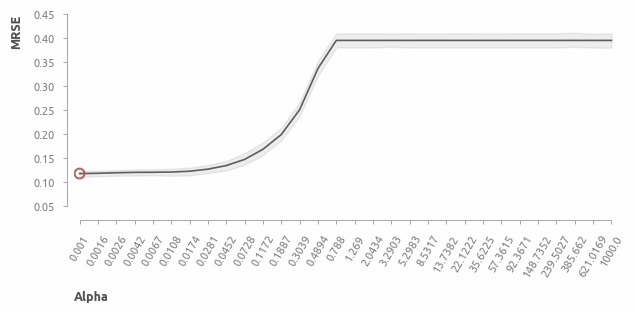

Images 'regularization.png' and 'regularization.svg' successfully saved into 'docs/img/Section4-Linear-models-research' directory


In [31]:
fig, ax = plt.subplots(figsize=(7, 2.5))

sns.lineplot(
    data=cv_results_prep,
    x='parameters',
    y='rmse',
    err_kws=({'alpha': 0.1})
)
sns.scatterplot(
    data=enet_results[enet_results['rank_test_score']==1],
    x='parameters',
    y='mean_test_score',
    s=50, color=palette[1], facecolor='none',
    ec=palette[1], linewidth=1.5, zorder=10, alpha=0.9
)
plt.xlabel(str.capitalize('Alpha'))
plt.ylabel('MRSE')
# ax.set_title('Elastic Net: regularization effect')
ax.tick_params(axis='x', rotation=60)
# ax.xaxis.set_major_locator(matplotlib.ticker.AutoLocator())
axis_rstyle()


plt.grid(False)
plt.show()

savefig('regularization', save_img)

### ELASTIC NET Model

In [32]:
enet_regressor = ElasticNet(
    **enet_cv_best_params,
    random_state=seed
)

In [33]:
enet = Pipeline([
    ('encoder', encoder),
    ('scaler', scaler),
    ('estimator', enet_regressor)
])

In [34]:
enet.fit(X,y)

Pipeline(steps=[('encoder',
                 OrdinalEncoder(missing_values='ignore', unseen='encode',
                                variables=['mszoning', 'street', 'alley',
                                           'lotshape', 'landcontour',
                                           'utilities', 'lotconfig',
                                           'landslope', 'neighborhood',
                                           'condition_first',
                                           'condition_second', 'bldgtype',
                                           'housestyle', 'roofstyle',
                                           'roofmatl', 'exterior_first',
                                           'exterior_second', 'masvnrtype',
                                           'foundation', 'heating',
                                           'centralair', 'electrical',
                                           'paveddrive', 'fence', 'miscfeature',
                                           'saletype', 'salecondition',
                                           'mssubclass'])),
                ('scaler', StandardScaler()),
                ('estimator', ElasticNet(alpha=0.001, random_state=42))])

In [35]:
enet_summary = pd.DataFrame({
    'feature': enet.feature_names_in_,
    'coeff': enet.named_steps['estimator'].coef_,
    'intercept': enet.named_steps['estimator'].intercept_
}).sort_values('coeff', key=abs, ascending=False)

In [36]:
enet_summary[enet_summary['coeff'] != 0].shape

(88, 3)

In [37]:
enet_summary.head(10)

,feature,coeff,intercept
13,lg_grlivarea,0.109304,12.024989
9,lg_totalbsmtsf,0.082895,12.024989
92,totalbsmtsf_exst,-0.080347,12.024989
35,overallqual,0.072446,12.024989
79,lg_flrsfmean,0.051306,12.024989
34,overallcond,0.043021,12.024989
60,neighborhood,0.035840,12.024989
19,kitchenabvgr,-0.034390,12.024989
2,lg_lotarea,0.031234,12.024989
6,lg_bsmtfinsf_first,0.027962,12.024989


### Features Research with Elastic Net

In [38]:
X_fr = X.copy()

In [39]:
pipe = Pipeline([
    ('encoder', encoder),
    ('scaler', scaler),
])

In [40]:
X_fr[features] = pipe.fit_transform(X_fr[features], y)

In [41]:
st = stopwatch.start()
results_sim_dict = simulation_enet_features(X_fr, y, alphas)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:00:08


In [42]:
elnet_features_df = pd.DataFrame(results_sim_dict)

In [43]:
# save the list of lists with chosen features by enet in variable
features_chosen = elnet_features_df['features_list'].copy()

In [44]:
# modificate column 'features_list': list of strings -> string
# for more aesthetic view in df
elnet_features_df['features_list'] = \
    elnet_features_df['features_list'].apply(lambda x: ' , '.join(x))

In [45]:
elnet_features_df[elnet_features_df['features_num'] > 0]

,score,alpha,features_num,vif_max_value,features_list
0,0.106288,0.001000,88,504.2,"mssubclass , lg_lotfrontage , lg_lotarea , lg_..."
1,0.107548,0.001610,79,176.2,"mssubclass , lg_lotfrontage , lg_lotarea , lg_..."
2,0.109254,0.002593,68,157.3,"mssubclass , lg_lotfrontage , lg_lotarea , lg_..."
3,0.110799,0.004175,59,153.3,"mssubclass , lg_lotfrontage , lg_lotarea , lg_..."
4,0.112194,0.006723,55,152.8,"mssubclass , lg_lotfrontage , lg_lotarea , lg_..."
5,0.113713,0.010826,44,150.7,"mssubclass , lg_lotarea , lg_bsmtfinsf_first ,..."
6,0.116445,0.017433,38,150.2,"mssubclass , lg_lotarea , lg_bsmtfinsf_first ,..."
7,0.121491,0.028072,33,555.5,"mssubclass , lg_lotarea , yearbuilt , lg_bsmtf..."
8,0.130344,0.045204,28,148.3,"mssubclass , lg_lotarea , lg_bsmtfinsf_first ,..."
9,0.145161,0.072790,24,250.4,"mssubclass , lg_lotarea , lg_yearremodadd , lg..."


In [46]:
alpha_log = np.log(elnet_features_df['alpha'])

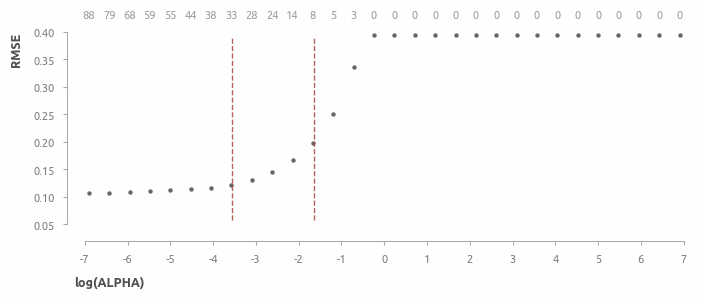

Images 'features_plot.png' and 'features_plot.svg' successfully saved into 'docs/img/Section4-Linear-models-research' directory


In [47]:
xup_labels = elnet_features_df['features_num'].values
ticks = [int(i) for i in np.arange(-7, 7.1, 1)]

fig, ax = plt.subplots(figsize=(8, 2.5))
# f = plt.figure(figsize=(7, 2.5))
# plt.title('Features by Elastic Net', loc='left', pad=12)
plt.scatter(
    x=alpha_log, y=elnet_features_df['score'],
    ec='face', lw=0, s=10, alpha=0.95)
plt.xlabel('log(ALPHA)')
plt.ylabel('RMSE')
plt.xlim(-7.25, 7.25)
plt.ylim(0.08, 0.40)
plt.xticks(ticks=ticks, labels=ticks)
plt.grid(False)

axis_rstyle()
# top xaxis
xaxis_top = plt.twiny()
xaxis_top.set_xlim(-7.25, 7.25)
xaxis_top.set_xticks(ticks=alpha_log)
xaxis_top.spines['top'].set_position(('outward', 5))
xaxis_top.tick_params(left=False, bottom=False, top=False)
xaxis_top.set_xticklabels(labels=xup_labels, weight='normal', fontsize=8)
xaxis_top.grid(False)
xaxis_top.spines['left'].set_visible(False)
xaxis_top.spines['bottom'].set_visible(False)
# vertical red liness
plt.axvline(
    -1.65, ymin=0.02, ymax=0.98, linestyle='--',
    lw=1, color=palette[1], alpha=0.95)
plt.axvline(
    -3.55, ymin=0.02, ymax=0.98, linestyle='--',
    lw=1, color=palette[1], alpha=0.95)
ax.spines['bottom'].set_position(('outward', 12))

plt.show()

savefig('features_plot', save_img)

In [48]:
features_chosen = \
    [element for sublist in features_chosen for element in sublist]

In [49]:
features_chosen_dict = {i:features_chosen.count(i) for i in features_chosen}

In [50]:
features_chosen_enet = pd.DataFrame({
    'feature': features_chosen_dict.keys(),
    'appeared': features_chosen_dict.values()
})
features_chosen_enet = (features_chosen_enet
                        .sort_values('appeared', ascending=False)
                        .reset_index(drop=True))

## Linear Regression for HousePricePredictor

### Features Selection

#### Correlation Matrix

In [51]:
corr_df = train[numeric + ordinal + [target]].corr()

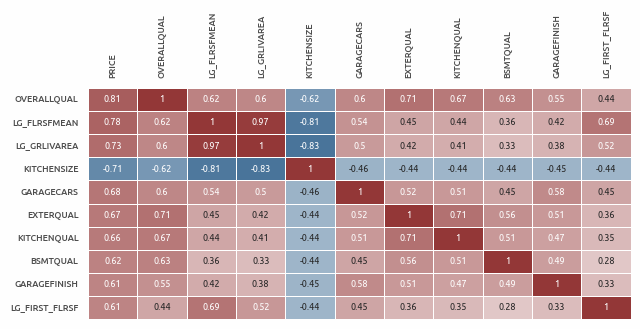

Images 'corr_matrix_linear.png' and 'corr_matrix_linear.svg' successfully saved into 'docs/img/Section4-Linear-models-research' directory


In [52]:
fig = plot_corr_matrix(
    data=corr_df, target=target, num_features=10,
    width=0.7, height=0.3, annot=6.5, labelsize=6.5,
    linecolor=theme, full=True, abs_results=True, df=False, df_limit=None)
plt.show()

savefig('corr_matrix_linear', save_img, dpi=125)

In [53]:
features_chosen_enet.head(10)

,feature,appeared
0,overallqual,14
1,lg_flrsfmean,14
2,neighborhood,14
3,garagecars,13
4,garagefinish,12
5,bsmtqual,12
6,kitchenqual,12
7,exterqual,11
8,mssubclass,11
9,lg_first_flrsf,11


In [54]:
enet_summary.head(15)

,feature,coeff,intercept
13,lg_grlivarea,0.109304,12.024989
9,lg_totalbsmtsf,0.082895,12.024989
92,totalbsmtsf_exst,-0.080347,12.024989
35,overallqual,0.072446,12.024989
79,lg_flrsfmean,0.051306,12.024989
34,overallcond,0.043021,12.024989
60,neighborhood,0.035840,12.024989
19,kitchenabvgr,-0.034390,12.024989
2,lg_lotarea,0.031234,12.024989
6,lg_bsmtfinsf_first,0.027962,12.024989


In [55]:
print(features_chosen_enet['feature'].tolist())

['overallqual', 'lg_flrsfmean', 'neighborhood', 'garagecars', 'garagefinish', 'bsmtqual', 'kitchenqual', 'exterqual', 'mssubclass', 'lg_first_flrsf', 'modage', 'lg_lotarea', 'lg_bsmtfullbath', 'lg_grlivarea', 'fireplacequ', 'houseage', 'fireplaces', 'lg_bsmtfinsf_first', 'salecondition', 'centralair', 'bsmtexposure', 'functional', 'heatingqc', 'mszoning', 'overallcond', 'saletype', 'condition_first', 'garageage', 'exterior_first', 'kitchensize', 'foundation', 'poolqc', 'landcontour', 'roofstyle', 'bsmtfintype_first', 'paveddrive', 'kitchenabvgr', 'lg_wooddecksf', 'lg_screenporch', 'fence', 'totrmsabvgrd', 'fullbath', 'street', 'lotshape', 'utilities', 'halfbath', 'masvnrtype', 'roofmatl', 'bathsfracbedr', 'heating', 'alley', 'lotconfig', 'yrsold', 'lg_lotfrontage', 'garagetype', 'garagequal', 'miscval_exst', 'masvnrarea_exst', 'bsmtfinsf_second_exst', 'totalbsmtsf_exst', 'electrical', 'lg_bsmtunfsf', 'mosold', 'landslope', 'lg_totalbsmtsf', 'openporchsf_exst', 'three_ssnporch_exst', 'e

In [56]:
print(categorical)

['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition_first', 'condition_second', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior_first', 'exterior_second', 'masvnrtype', 'foundation', 'heating', 'centralair', 'electrical', 'paveddrive', 'fence', 'miscfeature', 'saletype', 'salecondition', 'mssubclass']


In [57]:
features_linear = [
    'lg_flrsfmean', 'overallqual', 'houseage',
    'lg_lotarea', 'overallcond', 'bsmtqual',
    'garagecars', 'kitchenqual', 'exterqual',  
]

In [58]:
len(features_linear)

9

In [59]:
data = train[features_linear + [target]].copy()

In [60]:
data_raw = data.copy()

In [61]:
data_cv = train_cv[features_linear + [target]].copy()

### Cut outliers

In [62]:
data.shape

(1311, 10)

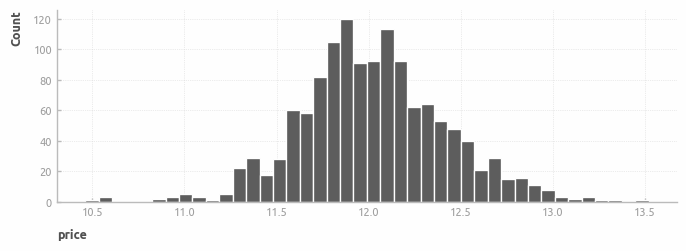

In [63]:
sns.histplot(data[target], bins=42, alpha=1);

In [64]:
target_trim = OutlierTrimmer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=target)

In [65]:
target_trim.fit(data)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both', variables='price')

In [66]:
data = target_trim.transform(data)

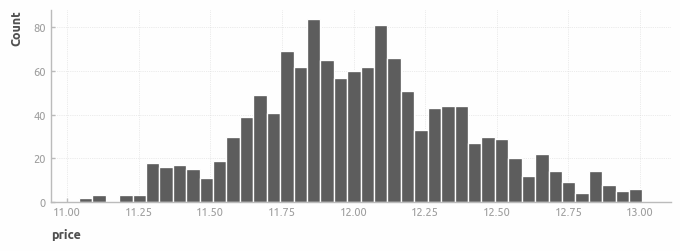

In [67]:
sns.histplot(data[target], bins=42, alpha=1);

In [68]:
data.shape

(1287, 10)

#### LINEAR REGRESSION

In [69]:
data.head()

,lg_flrsfmean,overallqual,houseage,lg_lotarea,overallcond,bsmtqual,garagecars,kitchenqual,exterqual,price
907,0.890837,0.658296,1.086695,0.460637,1.282781,0.589113,-1.035399,0.751124,1.063566,12.429216
782,0.208510,0.658296,-0.946281,1.132222,-0.519712,0.589113,0.312573,0.751124,1.063566,12.139399
952,-1.915383,-0.805701,0.004627,-0.443275,2.184027,0.589113,-1.035399,-0.768511,-0.692523,11.804849
620,-1.513143,-2.269698,1.873653,-0.180967,-2.322204,-0.561896,-2.383371,-0.768511,-0.692523,11.112448
669,-0.448245,-1.537699,1.545754,0.477350,-0.519712,-1.712905,-1.035399,-2.288146,-0.692523,11.831379


In [70]:
data, formula = lr_model_data_formula(
    data=data, target='price', predictors=features_linear)

In [71]:
data.shape

(1287, 10)

In [72]:
formula

'price ~ lg_flrsfmean + overallqual + houseage + lg_lotarea + overallcond + bsmtqual + garagecars + kitchenqual + exterqual'

In [73]:
# cov_type='HC3' - for robust confidence intervals (in case of heteroscedasticity)
lr = smf.ols(formula=formula, data=data).fit(cov_type='HC3')

In [74]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1079.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:25:02   Log-Likelihood:                 857.47
No. Observations:                1287   AIC:                            -1695.
Df Residuals:                    1277   BIC:                            -1643.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.0263      0.004   3422.955   

In [75]:
y_pred_lr = lr.predict(data[features_linear])

In [76]:
rmse_lr = mean_squared_error(data[target], y_pred_lr, squared=False)

In [77]:
rmse_lr

0.12428313100053122

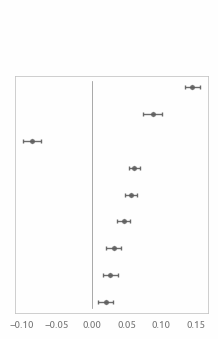

In [78]:
f = plot_lr_coef(lr, figsize=(2.5, 3.07))

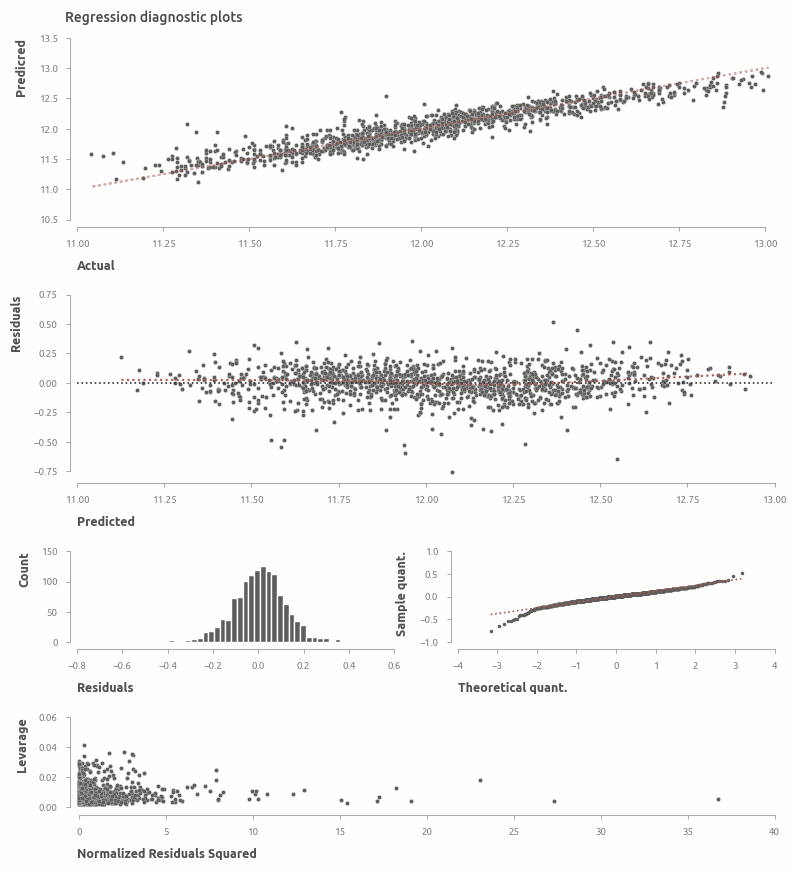

Images 'regression_diagnostics.png' and 'regression_diagnostics.svg' successfully saved into 'docs/img/Section4-Linear-models-research' directory


In [79]:
fig = plot_regression_diagnostics(
    model=lr, 
    data=data,
    target=target,
    figsize=(9, 10)
)
fig.suptitle('Regression diagnostic plots', x=0.210, y=0.908, fontsize=10)
plt.subplots_adjust(hspace=0.55)
plt.show()

savefig('regression_diagnostics', save_img)

In [80]:
regression_diagnostics(lr, data[features_linear], alpha=0.05)

,Test,Category,P or Statistic (s),Condition
0,Ramsey’s RESET,Model,0.0000,Non-linear effects
1,Fisher Criterion,Model,0.0000,Significant
2,VIF (s),Predictors,3.2070,No multicollinearity
3,Condition Number (s),Predictors,4.3654,No multicollinearity
4,Cook's Distance (s),Residuals,83,Outliers detected
5,One Sample t-test,Residuals,1.0000,Mean equals zero
6,One Sample Wilcoxon test,Residuals,0.1093,Mean equals zero
7,One Sample Bootstrap test (s),Residuals,10000,Mean equals zero
8,Kolmogorov-Smirnov,Residuals,0.0000,Not normal
9,Anderson-Darling (s),Residuals,5.9447,Not normal


In [81]:
outliers_idxs = get_cooksd_outliers_idxs(model=lr, data=data)

In [82]:
residuals_df = pd.concat(
    objs=[y_pred_lr.rename('Predicted'), lr.resid.rename('Residuals')],
    axis=1)

In [83]:
residuals_df.shape

(1287, 2)

In [84]:
residuals_df['Residuals'].std()

0.12433144320099562

In [85]:
residuals_trim = OutlierTrimmer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables='Residuals')

In [86]:
residuals_df_trimmed = residuals_trim.fit_transform(residuals_df)
residuals_df_trimmed = residuals_df_trimmed.rename(columns={'Residuals': 'Residuals trimmed'})

In [87]:
residuals_df_trimmed.shape

(1248, 2)

In [88]:
test_normality(residuals_df_trimmed['Residuals trimmed'])

,Test,P or Statistic (s),Condition
0,Kolmogorov-Smirnov,0.0000,Not normal
1,Anderson-Darling (s),0.5592,Normal
2,Shapiro-Wilk,0.0126,Not normal
3,Jarque-Bera,0.0977,Normal
4,D’Agostino-Pearson,0.0849,Normal


In [89]:
residuals_df_trimmed['Residuals trimmed'].std()

0.10351815888623953

In [90]:
normal_dist = np.random.normal(
    loc=0, scale=residuals_df['Residuals'].std(ddof=1), size=1288)

In [91]:
test_normality(normal_dist)

,Test,P or Statistic (s),Condition
0,Kolmogorov-Smirnov,0.0000,Not normal
1,Anderson-Darling (s),0.2297,Normal
2,Shapiro-Wilk,0.7524,Normal
3,Jarque-Bera,0.3920,Normal
4,D’Agostino-Pearson,0.3977,Normal


In [92]:
kurtosis(pd.concat([
    pd.DataFrame(normal_dist, columns=['Normal distribution']),
    residuals_df['Residuals'].to_frame(),
    residuals_df_trimmed['Residuals trimmed'].to_frame()
]))
    

,Kurtosis,Type
Residuals,3.212255,Too Peaked
Residuals trimmed,-0.204763,Normal
Normal distribution,-0.133344,Normal


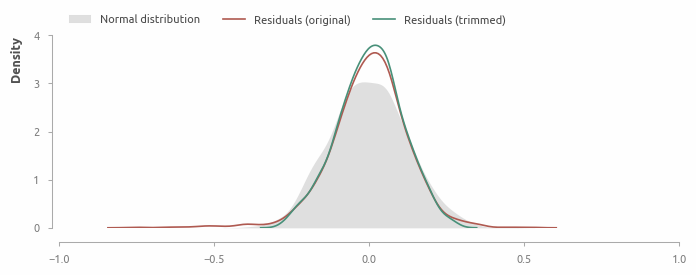

Images 'residuals_distributions_comparing.png' and 'residuals_distributions_comparing.svg' successfully saved into 'docs/img/Section4-Linear-models-research' directory


In [93]:
fig = plt.figure(figsize=(8, 2.5))

sns.kdeplot(normal_dist, lw=0.01, fill=True, color=alpha_color(palette[0], 0.75), label='Normal distribution')
sns.kdeplot(residuals_df['Residuals'], color=palette[1], label='Residuals (original)')
sns.kdeplot(residuals_df_trimmed['Residuals trimmed'], color=palette[3], label='Residuals (trimmed)')

plt.legend(**legend_inline())
# plt.title('Comparison of Residual distributions with and without outliers', **title_inline)
axis_rstyle(xticks=(-1.0, 1.0, 0.5), yticks=(0, 4, 1))
plt.grid(False)
plt.xlabel(None)
plt.show()

savefig('residuals_distributions_comparing', save_img)

### Simulations and comparing with ELASTIC NET

In [94]:
data_cv.shape

(1311, 10)

In [95]:
data_cv.head()

,lg_flrsfmean,overallqual,houseage,lg_lotarea,overallcond,bsmtqual,garagecars,kitchenqual,exterqual,price
907,6.935370,7,70,9.350189,7,4,1,4,4,12.429216
782,6.735990,7,8,9.698061,5,4,2,4,4,12.139399
952,6.115373,5,37,8.881975,8,4,1,3,3,11.804849
620,6.232910,3,94,9.017847,3,3,0,3,3,11.112448
669,6.544081,4,84,9.358847,5,2,1,2,3,11.831379


#### Hyperparameters Search

In [96]:
enet_cv_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', ElasticNet(max_iter=100000))
])

In [97]:
enet_cv_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', ElasticNet(max_iter=100000))])

In [98]:
alphas = np.logspace(-3, 3, 30)
l1_ratio = np.arange(0.1, 1.0, 0.1)
n_folds_cv = 20

X = data_cv.loc[:, data_cv.columns!=target]
y = data_cv[target]

In [99]:
enet_params = [{
    'estimator__alpha': alphas,
    'estimator__l1_ratio': l1_ratio
}]

In [100]:
st = stopwatch.start()
enet_cv = GridSearchCV(
    estimator=enet_cv_pipeline,
    param_grid=enet_params,
    scoring='neg_root_mean_squared_error',
    cv=n_folds_cv,
    refit=False
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:00:00


In [101]:
enet_cv.fit(X, y)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator',
                                        ElasticNet(max_iter=100000))]),
             param_grid=[{'estimator__alpha': array([1.00000000e-03, 1.61026203e-03, 2.59294380e-03, 4.17531894e-03,
       6.72335754e-03, 1.08263673e-02, 1.74332882e-02, 2.80721620e-02,
       4.52035366e-02, 7.27895384e-02, 1.17210230e-01, 1.88739182e-01,
       3.03919538e-01...-01, 1.26896100e+00,
       2.04335972e+00, 3.29034456e+00, 5.29831691e+00, 8.53167852e+00,
       1.37382380e+01, 2.21221629e+01, 3.56224789e+01, 5.73615251e+01,
       9.23670857e+01, 1.48735211e+02, 2.39502662e+02, 3.85662042e+02,
       6.21016942e+02, 1.00000000e+03]),
                          'estimator__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}],
             refit=False, scoring='neg_root_mean_squared_error')

In [102]:
enet_cv_best_score = abs(enet_cv.best_score_)
enet_cv_best_score

0.1336913451258356

In [103]:
enet_cv_best_params = {}

for key in enet_cv.best_params_.keys():
    new_key = key.lstrip('estimator')
    new_key = new_key.lstrip('__')
    enet_cv_best_params[new_key] = enet_cv.best_params_[key]
    
enet_cv_best_params

{'alpha': 0.006723357536499335, 'l1_ratio': 0.1}

In [104]:
enet = ElasticNet(**enet_cv_best_params)

In [105]:
enet

ElasticNet(alpha=0.006723357536499335, l1_ratio=0.1)

In [106]:
data_cv[features_linear] = StandardScaler().fit_transform(data_cv[features_linear])

In [107]:
data_cv.head()

,lg_flrsfmean,overallqual,houseage,lg_lotarea,overallcond,bsmtqual,garagecars,kitchenqual,exterqual,price
907,0.890837,0.658296,1.086695,0.460637,1.282781,0.589113,-1.035399,0.751124,1.063566,12.429216
782,0.208510,0.658296,-0.946281,1.132222,-0.519712,0.589113,0.312573,0.751124,1.063566,12.139399
952,-1.915383,-0.805701,0.004627,-0.443275,2.184027,0.589113,-1.035399,-0.768511,-0.692523,11.804849
620,-1.513143,-2.269698,1.873653,-0.180967,-2.322204,-0.561896,-2.383371,-0.768511,-0.692523,11.112448
669,-0.448245,-1.537699,1.545754,0.477350,-0.519712,-1.712905,-1.035399,-2.288146,-0.692523,11.831379


In [108]:
enet.fit(data_cv[features_linear], data_cv[target])

ElasticNet(alpha=0.006723357536499335, l1_ratio=0.1)

In [109]:
enet_coef = pd.concat([
    pd.Series(enet.feature_names_in_, name='feature'),
    pd.Series(enet.coef_, name='enet')
], axis=1)

# add Intercept as first row
enet_coef.loc[-1] = ['Intercept', enet.intercept_]
enet_coef.index = enet_coef.index + 1
enet_coef = enet_coef.sort_index()

In [110]:
enet_coef

,feature,enet
0,Intercept,12.024989
1,lg_flrsfmean,0.146236
2,overallqual,0.094140
3,houseage,-0.087181
4,lg_lotarea,0.062462
5,overallcond,0.058608
6,bsmtqual,0.042682
7,garagecars,0.035288
8,kitchenqual,0.028962
9,exterqual,0.018759


In [111]:
model_names = ['LR', 'ENet']
result_simulation_regressions = simulation_regressions(
    data_raw, target, lr, enet, model_names,
    sample_frac=1, n_folds=1000)

In [112]:
result_simulation_regressions.head()

,LR,ENet
0,0.136451,0.136142
1,0.138421,0.138096
2,0.137472,0.136882
3,0.136428,0.136103
4,0.134002,0.133822


In [113]:
result_simulation_regressions.mean()

LR      0.135369
ENet    0.134840
dtype: float64

In [114]:
result_simulation_regressions.std()

LR      0.005250
ENet    0.005093
dtype: float64

In [115]:
test_normality(result_simulation_regressions['LR'])

,Test,P or Statistic (s),Condition
0,Kolmogorov-Smirnov,0.0000,Not normal
1,Anderson-Darling (s),0.5213,Normal
2,Shapiro-Wilk,0.0601,Normal
3,Jarque-Bera,0.1557,Normal
4,D’Agostino-Pearson,0.1471,Normal


In [116]:
test_normality(result_simulation_regressions['ENet'])

,Test,P or Statistic (s),Condition
0,Kolmogorov-Smirnov,0.0000,Not normal
1,Anderson-Darling (s),0.5792,Normal
2,Shapiro-Wilk,0.0468,Not normal
3,Jarque-Bera,0.1290,Normal
4,D’Agostino-Pearson,0.1224,Normal


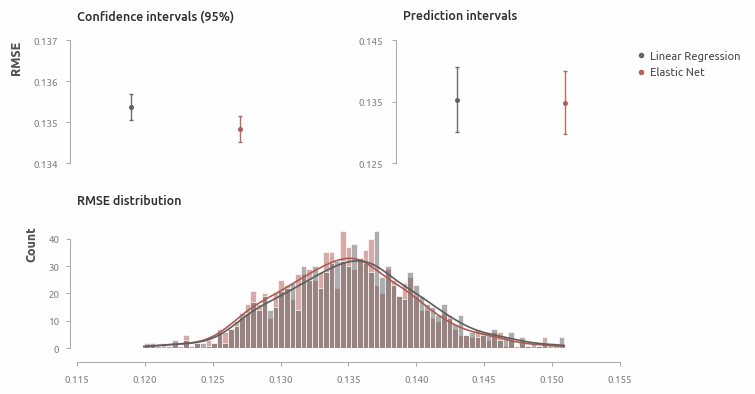

Images 'simulations.png' and 'simulations.svg' successfully saved into 'docs/img/Section4-Linear-models-research' directory


In [117]:
fig = plot_lr_enet_comparison(result_simulation_regressions)
# save plot
savefig('simulations', save_img)

In [118]:
lr_coef = lr.params.to_frame(name='lr')
# add column with ci
lr_coef = pd.concat([
    lr_coef,
    lr.conf_int().rename(columns={0: 'ci_min', 1: 'ci_max'})
], axis=1)
lr_coef = lr_coef.reset_index(names='feature')

In [119]:
lr_coef

,feature,lr,ci_min,ci_max
0,Intercept,12.026297,12.019411,12.033183
1,lg_flrsfmean,0.144424,0.133645,0.155203
2,overallqual,0.087951,0.074537,0.101366
3,houseage,-0.085404,-0.098368,-0.072440
4,lg_lotarea,0.061270,0.053008,0.069532
5,overallcond,0.055904,0.047263,0.064546
6,bsmtqual,0.046012,0.036325,0.055698
7,garagecars,0.031576,0.020456,0.042695
8,kitchenqual,0.026770,0.016015,0.037526
9,exterqual,0.020048,0.009430,0.030665


In [120]:
comparing_df = lr_coef.merge(enet_coef, on='feature')

In [121]:
comparing_df

,feature,lr,ci_min,ci_max,enet
0,Intercept,12.026297,12.019411,12.033183,12.024989
1,lg_flrsfmean,0.144424,0.133645,0.155203,0.146236
2,overallqual,0.087951,0.074537,0.101366,0.094140
3,houseage,-0.085404,-0.098368,-0.072440,-0.087181
4,lg_lotarea,0.061270,0.053008,0.069532,0.062462
5,overallcond,0.055904,0.047263,0.064546,0.058608
6,bsmtqual,0.046012,0.036325,0.055698,0.042682
7,garagecars,0.031576,0.020456,0.042695,0.035288
8,kitchenqual,0.026770,0.016015,0.037526,0.028962
9,exterqual,0.020048,0.009430,0.030665,0.018759


In [122]:
comparing_df_plot = comparing_df.iloc[1:].copy()
comparing_df_plot.sort_values('lr', key=abs, ascending=True, inplace=True)
comparing_df_plot.reset_index(drop=True, inplace=True)
# xticks for plot
xticks = np.arange(1, len(comparing_df_plot['feature'])+1)
# yticks for plot
yticks = comparing_df_plot.index.tolist()
yticks = yticks[::-1]
yticks = [(i+1) for i in yticks]
ylabels = comparing_df_plot['feature'].values.tolist()
ylabels = ylabels[::-1]
ylabels = [str.upper(i) for i in ylabels]
labels = comparing_df_plot['feature']
# delta for points of scatterplots
delta_coeff = 0.125

Images 'coefficients_comparing.png' and 'coefficients_comparing.svg' successfully saved into 'docs/img/Section4-Linear-models-research' directory


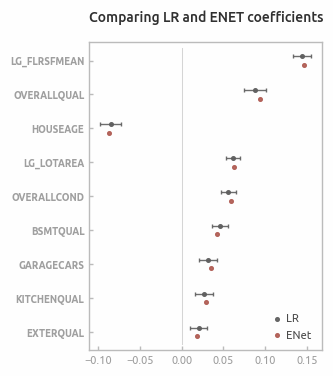

In [123]:
# figure
fig = plt.figure(figsize=(3, 4))
# scatterplots
ax = plt.scatter(
    x=comparing_df_plot['lr'], y=xticks+delta_coeff,
    s=7, color=palette[0], alpha=0.9
)
ax = plt.scatter(
    x=comparing_df_plot['enet'],y=xticks-delta_coeff,
    s=7, color=palette[1], alpha=0.9
)
# plot errorbar
yerr = ([comparing_df_plot['lr'] - comparing_df_plot['ci_min'],
         comparing_df_plot['ci_max'] - comparing_df_plot['lr']])
plt.errorbar(
    x=comparing_df_plot['lr'], y=xticks+delta_coeff,
    xerr=yerr, fmt='none', elinewidth=1, capsize=1.2,
    capthick=1, alpha=0.9)
# plot zero line
plt.axvline(
    0, ymin=0.02, ymax=0.98, color=palette[0], lw=0.75, alpha=0.25)
# legend
plt.legend(
    labels=['LR', 'ENet'], loc='lower right', handletextpad=-0.15)
# spines
ax.axes.spines[['top', 'right']].set_visible(True)
# ticks
plt.yticks(ticks=yticks, labels=ylabels, weight='bold', fontsize=7)
# title
plt.title('Comparing LR and ENET coefficients')
# remove grid
plt.grid(False)
# save plot
savefig('coefficients_comparing', save_img)

### Save Data

In [124]:
simulation_datasets_dict['train_enet'] = data_cv
simulation_datasets_dict['features_enet'] = features_linear

In [125]:
estimators_dict['enet'] = enet
estimators_dict['lr'] = lr

In [126]:
evaluation_dict['cv_enet'] = enet_cv

In [127]:
features_dict['features_linear'] = features_linear

In [128]:
saveit(features_dict, 'features_dict', save_files)

In [129]:
saveit(simulation_datasets_dict, 'simulation_datasets_dict', save_files)

In [130]:
saveit(estimators_dict, 'estimators_dict', save_files)

In [131]:
saveit(evaluation_dict, 'evaluation_dict', save_files)

### Save Session

In [132]:
save_session(session_name)

### Execution time

In [133]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:03:23
